# [CDAF] Atividade 3

## Nome e matrícula
Nome: João Antonio Oliveira Pedrosa
Matrícula: 2019006752

## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_actions.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [40]:
import pandas as pd
import json
from socceraction import spadl
import matplotlib.pyplot as plt
import matplotsoccer as mps
import scipy

In [2]:
with open("events/events_England.json", "r") as f:
    data_dict = json.load(f)

In [3]:
# Passing from WyScout to a DataFrame

match_id = 2499719
home_team_id = 1609

match_dict = [x for x in data_dict if x['matchId'] == match_id]
df_match = pd.DataFrame.from_dict(match_dict)

df_match

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
1763,8,Launch,[{'id': 1802}],8480,"[{'y': 53, 'x': 7}, {'y': 49, 'x': 46}]",2499719,Pass,1631,2H,2992.491575,84,177961040
1764,8,Head pass,[{'id': 1801}],49876,"[{'y': 51, 'x': 54}, {'y': 58, 'x': 73}]",2499719,Pass,1609,2H,2994.900590,82,177961035
1765,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",7870,"[{'y': 58, 'x': 73}, {'y': 0, 'x': 0}]",2499719,Shot,1609,2H,2997.086392,100,177961036
1766,5,Ball out of the field,[],0,"[{'y': 48, 'x': 3}, {'y': 100, 'x': 100}]",2499719,Interruption,1631,2H,2998.963701,50,177961041


In [5]:
# Some Preprocessing and passing to Spadl
correct_columns = {'eventId':'type_id', 'subEventName':'subtype_name', 'playerId':'player_id',
              'matchId':'game_id', 'eventName':'type_name', 'teamId':'team_id',
              'eventSec':'milliseconds', 'subEventId':'subtype_id', 'id':'event_id'
              }
df_match.rename(columns=correct_columns, inplace=True)
df_match['period_id'] = pd.factorize(df_match['matchPeriod'])[0]+1

events_spadl = spadl.wyscout.convert_to_actions(df_match, home_team_id)
events_spadl = spadl.play_left_to_right(events_spadl, home_team_id)

typename = spadl.actiontypes_df()
bodyparts = spadl.bodyparts_df()
results = spadl.results_df()
merged = pd.merge(events_spadl, typename, on='type_id')
merged1 = pd.merge(merged, bodyparts, on='bodypart_id')
final_match_events = pd.merge(merged1, results, on='result_id')
final_match_events = final_match_events.drop(['type_id', 'bodypart_id', 'result_id'], axis=1)
match_events = final_match_events.rename(columns={'type_name': 'type', 'bodypart_name':'bodypart', 'result_name':'result'})
match_events = match_events.sort_values(by=["period_id", "time_seconds"])
match_events

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499719,1,0.002759,1609,25413,51.45,34.68,32.55,14.96,177959171,0,pass,foot,success
1,2499719,1,0.004947,1609,370224,32.55,14.96,53.55,17.00,177959172,1,pass,foot,success
2,2499719,1,0.010302,1609,167145,43.05,3.40,75.60,8.16,177959175,4,pass,foot,success
3,2499719,1,0.020427,1609,14869,47.25,37.40,74.55,31.28,177959180,10,pass,foot,success
4,2499719,1,0.029981,1631,265366,30.45,50.32,38.85,62.56,177959196,15,pass,foot,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2499719,1,1.357998,1609,3319,70.35,48.96,78.75,38.76,177959643,320,pass,foot,offside
1294,2499719,1,2.021499,1609,3319,69.30,48.28,93.45,57.80,177959880,503,pass,foot,offside
1295,2499719,1,2.749221,1631,8480,9.45,23.12,58.80,4.08,177960099,657,pass,foot,offside
1296,2499719,2,2.760978,1609,25413,85.05,31.28,93.45,19.04,177960971,1256,pass,foot,offside


## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.actions [3].

In [10]:
actions = match_events.head(5)

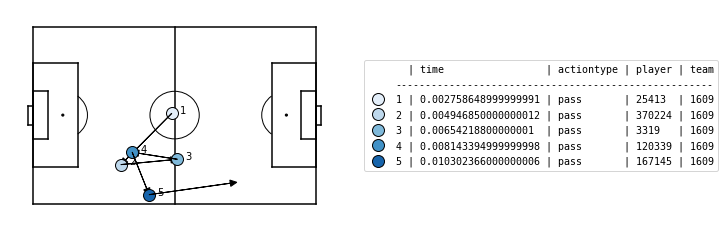

In [11]:
mps.actions(
    location=actions[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions.type,
    team=actions.team_id,
    result= actions.result == "success",
    label=actions[["time_seconds", "type", "player_id", "team_id"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)

## Questão 3
- Visualize os chutes da partida, desenvolvendo seu código em cima do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time as melhores chances da partida? Por quê?

In [22]:
match_events

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,action_id,type,bodypart,result
0,2499719,1,0.002759,1609,25413,51.45,34.68,32.55,14.96,177959171,0,pass,foot,success
1,2499719,1,0.004947,1609,370224,32.55,14.96,53.55,17.00,177959172,1,pass,foot,success
917,2499719,1,0.006542,1609,3319,53.55,17.00,36.75,19.72,177959173,2,pass,head,success
918,2499719,1,0.008143,1609,120339,36.75,19.72,43.05,3.40,177959174,3,pass,head,success
2,2499719,1,0.010302,1609,167145,43.05,3.40,75.60,8.16,177959175,4,pass,foot,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,2499719,2,2.990768,1631,8653,11.55,21.76,7.35,31.96,177961039,1293,pass,foot,success
1142,2499719,2,2.992492,1631,8480,7.35,31.96,48.30,34.68,177961040,1294,pass,foot,fail
961,2499719,2,2.994901,1609,49876,56.70,33.32,76.65,28.56,177961035,1295,pass,head,success
1209,2499719,2,2.997086,1609,7870,76.65,28.56,105.00,27.20,177961036,1296,shot,foot,fail


Plot for team with id 1609


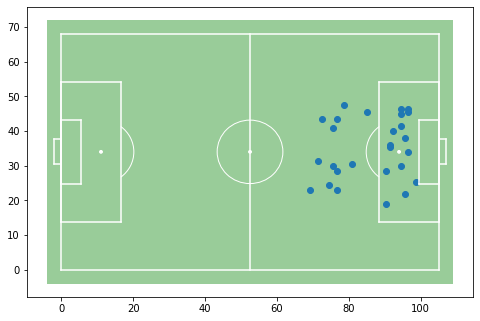

Plot for team with id 1631


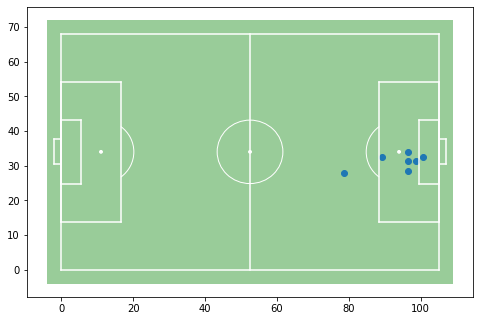

In [28]:
teams = match_events["team_id"].unique()

for team in teams:
    x = []
    y = []
    for i in range(len(match_events)):
        if match_events["team_id"][i] == team and match_events["type"][i] == "shot":
            x.append(match_events["start_x"][i])
            y.append(match_events["start_y"][i])
    
    print("Plot for team with id", team)
    mps.field("green",figsize=8, show=False)
    plt.scatter(x,y)
    plt.axis("on")
    plt.show()

Com esse plot é possível perceber que o time da casa (Id = 1609) teve muito mais finalizações, tanto dentro quanto fora da área, do que o time fora.

É possível perceber 15 chutes de dentro da área do time da casa contra apenas 6 chutes de dentro da área do time fora.

## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? O comportamento dele varia muito do ataque para a defesa?

In [64]:
player = 25413
offensive = {'pass', 'dribble', 'freekick_short', 'cross', 'shot', 'clearance', 'throw_in',
       'goalkick', 'corner_short', 'corner_crossed', 'freekick_crossed'}
deffensive = {'interception', 'take_on', 'tackle', 'foul', 'keeper_save'}

x = []
x_of = []
x_df = []
y = []
y_of = []
y_df = []
for i in range(len(match_events)):
    if match_events["player_id"][i] == player:
        x.append(match_events["start_x"][i])
        y.append(match_events["start_y"][i])
        
        if match_events["type"][i] in offensive:
            x_of.append(match_events["start_x"][i])
            y_of.append(match_events["start_y"][i])
        elif match_events["type"][i] in deffensive:
            x_df.append(match_events["start_x"][i])
            y_df.append(match_events["start_y"][i])

Todas as ações



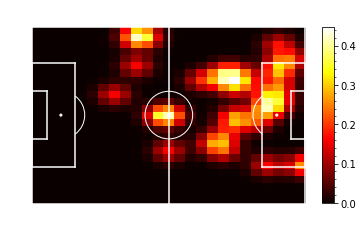

Ações Ofensivas



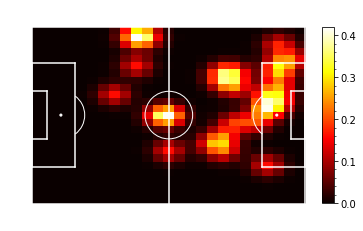

Ações Defensivas



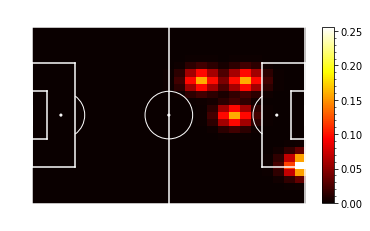

<AxesSubplot:>

In [65]:
print("Todas as ações\n")
hm = mps.count(pd.Series(x),pd.Series(y),n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm,1) # blur the heatmap
mps.heatmap(hm,cmap="hot",linecolor="white",cbar=True)

print("Ações Ofensivas\n")
hm = mps.count(pd.Series(x_of),pd.Series(y_of),n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm,1) # blur the heatmap
mps.heatmap(hm,cmap="hot",linecolor="white",cbar=True)

print("Ações Defensivas\n")
hm = mps.count(pd.Series(x_df),pd.Series(y_df),n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm,1) # blur the heatmap
mps.heatmap(hm,cmap="hot",linecolor="white",cbar=True)

Varia bastante. Os eventos ofensivos do jogador se espalham para ambos os lados do campo enquanto os comportamentos defensivos tendem a ficar mais concentrados na zona de ataque. O jogador também possui muito mais eventos ofensivos do que defensivos (O que pode ser justificado pelo fato da maioria dos eventos terem sido considerados como ofensivos, também).

## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

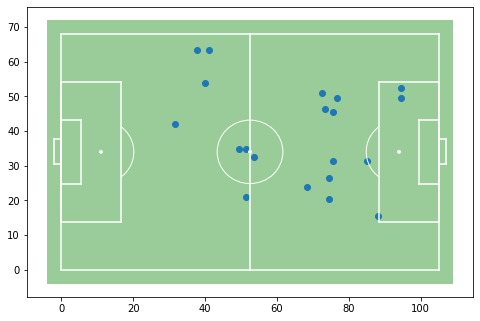

In [69]:
x = []
y = []
for i in range(len(match_events)):
    if match_events["player_id"][i] == player and match_events["type"][i] == "pass":
        x.append(match_events["start_x"][i])
        y.append(match_events["start_y"][i])

mps.field("green",figsize=8, show=False)
plt.scatter(x,y)
plt.axis("on")
plt.show()

O mapa de passes evidencia um comportamento mais ativo do jogador perto do gol adversário, além de mostrar que o jogador é ligeiramente mais ativo pelo lado esquerdo de campo do que pelo direito.

## Questão 6
- Crie uma rede de passes de cada uma das equipes, desenvolvendo seu código em cima do dataframe SPADL. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?

Não deu tempo, Hugão, essa semana tá complicada :/

Mas vou deixar uma ascii art do galão aqui pra alegrar sua correção:

⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠛⠛⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿ <br/> 
⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠋⣀⠴⠦⣀⠙⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿ <br/>
⡏⠉⠛⠛⠛⠛⠛⠉⢁⣠⠖⠋⠄⠄⠄⠄⠙⠲⣄⡈⠉⠛⠛⠛⠛⠛⠉⢹ <br/>
⠇⢸⠉⠉⠉⠉⣉⣀⠄⠄⠄⠄⠄⣀⠄⠄⠄⠄⢀⣀⠄⠉⣉⠉⠉⠉⡇⢸ <br/>
⡄⢸⠄⠄⢠⣾⠉⠉⠁⠄⠄⠄⣰⡏⣆⠄⠄⠄⢸⡟⣇⣸⣿⠄⠄⠄⡇⢸ <br/>
⡇⢸⠄⠄⠄⠛⠤⠖⠂⠄⠄⠠⠟⠛⠻⠆⠄⠄⠸⠇⠻⠟⠿⠄⠄⠄⡇⢸ <br/>
⣧⠈⡶⠶⠶⠶⢶⡶⠶⠶⠶⣶⠶⠶⠶⠶⣶⠶⠶⠶⢶⡶⠶⠶⠶⢶⠄⣼ <br/>
⣿⡄⣇⠄⠄⠄⢸⡇⠄⠄⠄⣿⠄⠄⠄⠄⣿⠄⠄⠄⢸⡇⠄⠄⠄⣸⢠⣿ <br/>
⣿⣿⠘⡆⠄⠄⢸⡇⠄⠄⠄⣿⠄⠄⠄⠄⣿⠄⠄⠄⢸⡇⠄⠄⢰⠃⣿⣿ <br/>
⣿⣿⣆⠙⣆⠄⢸⡇⠄⠄⠄⣿⠄⠄⠄⠄⣿⠄⠄⠄⢸⡇⠄⣰⠋⣰⣿⣿ <br/>
⣿⣿⣿⣦⠘⢦⢸⡇⠄⠄⠄⣿⠄⠄⠄⠄⣿⠄⠄⠄⢸⡇⡴⠃⣴⣿⣿⣿ <br/>
⣿⣿⣿⣿⣷⣀⢾⡇⠄⠄⠄⣿⠄⠄⠄⠄⣿⠄⠄⠄⢸⡷⣀⣾⣿⣿⣿⣿ <br/>
⣿⣿⣿⣿⣿⣿⣄⠙⢆⠄⠄⣿⠄⠄⠄⠄⣿⠄⠄⡰⠋⣠⣿⣿⣿⣿⣿⣿ <br/>
⣿⣿⣿⣿⣿⣿⣿⣷⣄⠙⣄⣿⠄⠄⠄⠄⣿⣠⠋⣠⣾⣿⣿⣿⣿⣿⣿⣿ <br/>
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣌⠙⠢⣄⣠⠔⠋⣡⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿ <br/>
⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣦⣌⣡⣴⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿ <br/>